# Recap
- we have seen how to build Pipelines of Transformers and Estimators with scikit-learn (`Pipeline`, `make_pipeline`)
- we have seen how to create a concatenation of transformers with scikit-learn (`FeatureUnion`, `make_union`)

Now let's do some exercise with some data!

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('../data/house_train.csv')

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Some pandas Recap

- Identify the types of column
- Identify columns containing missing values. 
- For each of these columns calculate percentage of data containing missing values. What would you do with these columns? 

<div>

for item in train.columns[train.isnull().any()].tolist():
    print(item,'-', train[item].dtype,'-', len(train[train[item].isnull()])/len(train))
</div>

This is what we are going to do in this exercise

<img src='../images/diagram_exercise.png'>

In [82]:
# drop MiscFeature, Fence, PoolQC, Alley
data.drop(labels=['MiscFeature','Fence','PoolQC','Alley'],axis=1,inplace=True)

In [83]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [84]:
# drop rows
data = data[(data.MasVnrArea.isnull()==False) & (data.MasVnrType.isnull()==False) & (data.Electrical.isnull()==False)]

In [85]:
len(data)

1451

Exercises:
-----------
1. create a Tranformer ```Selector``` that selects columns from the dataframe (*hint*: the Transformer takes a list of columns as input and returns the dataframe with only the selected columns
2. What kind of transformer is it? Stateful? Stateless?

**Solution**
<div>
from sklearn.base import BaseEstimator, TransformerMixin

class PandasSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        return X.loc[:,self.columns]
</div>

Exercise:
----------
1. create a Transformer that replace missing values of categorical columns with a new value (ex.: 'Not-given'). The new value can be given as an attribute 
2. create a Transformer that replace the missing values of categorical columns with the most common value
3. verify the Transformers above on one test column

**Solution**

<div>
class CategoricanImputerNew(BaseEstimator,TransformerMixin):
    
    def __init__(self, value):
        self.value = value
    
    def fit(self, X, y=None):
        assert X.dtypes.all() == 'object'
        return self
    
    def transform(self, X):
        X_ = X.fillna(self.value)
        return X_
        
class CategoricalImputerMostCommon(BaseEstimator,TransformerMixin):
    
    def __init__(self):
        """assert that all columns are of categorical type"""
    
    def fit(self, X, y=None):
        assert X.dtypes.all() == 'object'
        self.fill = pd.Series([X[c].value_counts().index[0] for c in X],
            index=X.columns)
        return self
    
    def transform(self, X):
        X_ = X.fillna(self.fill)
        return X_
</div>

Exercise:
----------
1. What would you do for missing values in numerical columns? Have a look at scikit-learn `Imputer`
2. Construct the first piece of the pipeline by combining the Columns selector and the inputer for Numerical and Categorical columns

**Solution**
<div>
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import Imputer

num_columns = ['OverallQual',
'GrLivArea',
'GarageCars',
'GarageArea',
'TotalBsmtSF',
'1stFlrSF',
'FullBath',
'TotRmsAbvGrd',
'YearBuilt',
'YearRemodAdd',
'GarageYrBlt',
'MasVnrArea',
'Fireplaces',
'BsmtFinSF1',
'LotFrontage']
cat_columns = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1']

first_union = make_union(
    #some numerical columns
        make_pipeline(
            PandasSelector(num_columns),
            Imputer(strategy='median')
        ),
    #some categorical columns
        make_pipeline(
            PandasSelector(cat_columns),
            CategoricalImputerMostCommon()
            ))
</div>

Exercise:
----------
1. Have a look at the categorical features. How many unique values do they contain?
2. Have a look at OneHotEncoder from category_encoders: `from category_encoders.one_hot import OneHotEncoder`

In [49]:
# HERE! Discuss difference between pd.get_dummies and OneHotEncoder (scikit-learn vs category_encoders)

Exercise:
----------
Add OneHotEncoder to to the Union

**Click here to see the solution**
<div>
from category_encoders.one_hot import OneHotEncoder
final_union = make_union(
    #some numerical columns
        make_pipeline(
            PandasSelector(num_columns),
            Imputer(strategy='median')
        ),
    #some categorical columns
        make_pipeline(
            PandasSelector(cat_columns),
            CategoricalImputerMostCommon(),
            OneHotEncoder()
            ))
</div>

The final step would be to add an estimator (a predictor) to the pipeline above.

Exercise
---------

1. Run and understand the code below (explain each line)
2. The problem is to predict future prices is cross validation a good method?
3. Try to use a train/test split based on YrSold

In [95]:
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error

est = RandomForestRegressor()

predictions = cross_val_predict(make_pipeline(final_union, est), 
                         data, 
                         np.log1p(data.SalePrice),
                         cv=5)

print(math.sqrt(mean_squared_error(data.SalePrice, np.expm1(predictions))))

31682.00721073981


**Solution**

<div>
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
#from sklearn.metrics import rmse
from sklearn.metrics import mean_squared_error

est = RandomForestRegressor()
training_data = data[data.YrSold <= 2009]
test_data = data[data.YrSold > 2009]
model = make_pipeline(final_union, est)
model.fit(training_data, np.log1p(training_data.SalePrice))
predictions = model.predict(test_data)
print(math.sqrt(mean_squared_error(np.log(test_data.SalePrice), np.log(np.expm1(predictions)))))
</div>

# Experiments with Time Series

The dataframe contains house prices in a time range between 2006 and 2010. Let's have a look at the sale price based on time.

Exercise:
----------
- Create a pandas dataframe containing the average house prices per Year-Month (*hint*: first create a new datetype colum that concatenate YrSold and MoSold)
- Create a plot of the price by Month. Do you see some seasonality? Trend?

In [7]:
data.loc[:,'Mo-YrSold'] = pd.to_datetime(data.YrSold.astype('str')+data.MoSold.astype('str'), format = '%Y%m')
ts_agg = data.groupby('Mo-YrSold')['SalePrice'].mean().reset_index(name='meanSalePrice')


In [8]:
ts_agg.head()

,Mo-YrSold,meanSalePrice
0,2006-01-01,201090.000000
1,2006-02-01,194322.222222
2,2006-03-01,184982.200000
3,2006-04-01,174312.814815
4,2006-05-01,158928.289474


<div>
train.loc[:,'Mo-YrSold'] = pd.to_datetime(train.YrSold.astype('str')+train.MoSold.astype('str'), format = '%Y%m')
ts_agg = train.groupby('Mo-YrSold')['SalePrice'].mean().reset_index(name='meanSalePrice')

from matplotlib import pyplot as plt
%matplotlib inline

ts_agg.plot(x='Mo-YrSold',y='meanSalePrice')
</div>

From the plot above we see a huge drop in summer 2010. Maybe this is due to too much noise since we are considering ALL the houses together? Let's try to build this plot for different overall conditions

Exercise:
----------
Consider the dataframe created above that contains the (average) price of houses by Month-Year. In this exercise we construct predictor for simple time series forecasting methods.
The predictor should have three methods: ```fit``` (to fit the data), ```predict``` (to return the prediction) and ```score``` (to calculate the error). 

1. Simple Average: Build an estimator that when fitted on the dataframe computes the avg price overall and returns it as prediction. Which metric would you choose for score?
2. Simple Moving Average: Generalize the estimator above so that a simple moving average of the last k points is possible (*hint* k should be given as argument in __init__ method)
3. Weighted Moving Average: Generalize the estimator above so that a weighted moving average of the last k points is given (*hint* beside k, a list of weights should be given as argument)

Plot the predictions for the three predictors above

**Solution**
<div>
import math

class AvgForecast(BaseEstimator,RegressorMixin):
    """Calculate avg and return it as prediction"""
        
    def fit(self, X):
        """Calculate avg of X values"""
        self.avg = np.mean(X)
        return self
    
    def predict(self, X):
        self.predict = np.array([self.avg for x in X])
        return self.predict
    
    def score(self, X):
        """Calculate rmse"""
        return math.sqrt(np.sum((X-self.predict)**2)/len(X))
 
class MovAvgForecast(BaseEstimator,RegressorMixin):
    """Calculate avg and return it as prediction"""
    
    def __init__(self, k):
        self.k = k
        
    def fit(self, X):
        """Calculate avg of X values"""
        k = self.k
        n = len(X)
        X_k = X[n-k:n]
        self.avg = np.mean(X_k)
        return self
    
    def predict(self, X):
        self.predict = np.array([self.avg for x in X])
        return self.predict
    
    def score(self, X):
        """Calculate rmse"""
        return math.sqrt(np.sum((X-self.predict)**2)/len(X))

    
class MovWeightAvgForecast(BaseEstimator,RegressorMixin):
    """Calculate avg and return it as prediction"""
    
    def __init__(self, k, weights):
        self.k = k
        self.weights = weights
        assert len(weights)==k
        assert np.sum(weights)==1
        
    def fit(self, X):
        """Calculate avg of X values"""
        k = self.k
        weights = self.weights
        n = len(X)
        X_k = X[n-k:n]
        self.avg = np.average(X_k,axis=0,weights=weights)
        return self
    
    def predict(self, X):
        self.predict = np.array([self.avg for x in X])
        return self.predict
    
    def score(self, X):
        """Calculate rmse"""
        return math.sqrt(np.sum((X-self.predict)**2)/len(X))
</div>

In [298]:
#x = np.array(ts_agg['meanSalePrice'])
#pred1 = pred1[0:10]  #pred1 is the result of predict for the first estimator
#x1 = np.append(x,pred1)
#pred2 = pred2[0:10]
#x2 = np.append(x,pred2)
#pred3 = pred3[0:10]
#x3 = np.append(x,pred3)

In [299]:
#fig = plt.figure()
#
#plt.plot(x1, color='r')
#plt.plot(x2, color='g')
#plt.plot(x3, color='b')


___________________________________

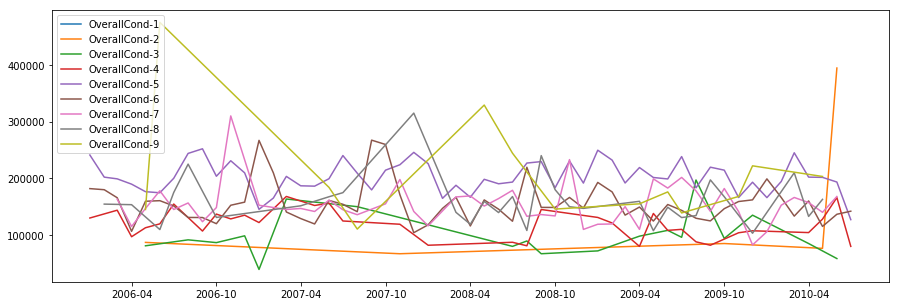

In [266]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)
for c in cond_unique:
    c_train= train[train['OverallCond']==c].groupby('Mo-YrSold')['SalePrice'].mean().reset_index(name='meanSalePrice')
    ax.plot(c_train['Mo-YrSold'], c_train['meanSalePrice'], label='OverallCond-'+str(c))
leg = ax.legend();
